<a href="https://colab.research.google.com/github/CHADHURBALA/Image-Classification/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x  

import tensorflow as tf
from tensorflow import keras


import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split tetsing and training

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

              

4422102/4422102 [==============================] - 0s 0us/step


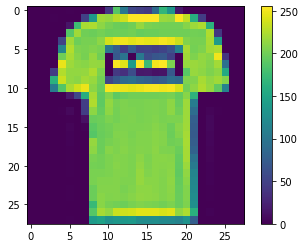

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer 
    keras.layers.Dense(128, activation='relu'),  # hidden layer
    keras.layers.Dense(10, activation='softmax') # output layer
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4984 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3746 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3397 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3132 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2945 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2802 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2681 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2573 - accuracy: 0.9025
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2477 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3340 - accuracy: 0.8843
Test accuracy: 0.8842999935150146


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([1.7628277e-09, 8.2438051e-10, 6.0477956e-09, 5.8875744e-09,
       1.4755810e-08, 4.0465503e-04, 1.5521861e-06, 1.2250621e-02,
       7.7610446e-07, 9.8734218e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

Pick a number: 2
1/1 [==============================] - 0s 24ms/step


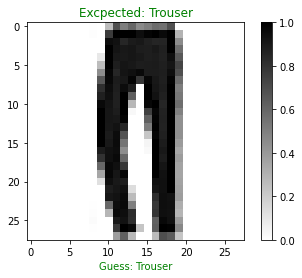

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label, color='green')
  plt.xlabel("Guess: " + guess, color='green')
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
